# Pandas Plotting, Grouping and Pivoting

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-dataset" data-toc-modified-id="The-dataset-1">The dataset</a></span><ul class="toc-item"><li><span><a href="#Shape" data-toc-modified-id="Shape-1.1">Shape</a></span></li><li><span><a href="#Description" data-toc-modified-id="Description-1.2">Description</a></span></li></ul></li><li><span><a href="#Some-plots" data-toc-modified-id="Some-plots-2">Some plots</a></span><ul class="toc-item"><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2.1">Histograms</a></span></li><li><span><a href="#Box-plots" data-toc-modified-id="Box-plots-2.2">Box plots</a></span></li><li><span><a href="#Scatter-plots" data-toc-modified-id="Scatter-plots-2.3">Scatter plots</a></span></li></ul></li><li><span><a href="#Grouping" data-toc-modified-id="Grouping-3">Grouping</a></span><ul class="toc-item"><li><span><a href="#Group-by-one-variable,-aggregate-another" data-toc-modified-id="Group-by-one-variable,-aggregate-another-3.1">Group by one variable, aggregate another</a></span></li><li><span><a href="#Group-by-multiple-variables,-aggregate-multiple-variables-in-different-ways" data-toc-modified-id="Group-by-multiple-variables,-aggregate-multiple-variables-in-different-ways-3.2">Group by multiple variables, aggregate multiple variables in different ways</a></span></li><li><span><a href="#Customized-functions" data-toc-modified-id="Customized-functions-3.3">Customized functions</a></span></li><li><span><a href="#Dealing-with-the-multi-index" data-toc-modified-id="Dealing-with-the-multi-index-3.4">Dealing with the multi-index</a></span><ul class="toc-item"><li><span><a href="#Swap-levels" data-toc-modified-id="Swap-levels-3.4.1">Swap levels</a></span></li><li><span><a href="#Sorting-along-a-particular-level" data-toc-modified-id="Sorting-along-a-particular-level-3.4.2">Sorting along a particular level</a></span></li></ul></li><li><span><a href="#Take-that" data-toc-modified-id="Take-that-3.5">Take that</a></span><ul class="toc-item"><li><span><a href="#We-can-access-different-parts-of-the-multi-level-structure-with-.xs()." data-toc-modified-id="We-can-access-different-parts-of-the-multi-level-structure-with-.xs().-3.5.1">We can access different parts of the multi-level structure with <code>.xs()</code>.</a></span></li><li><span><a href="#Using-.loc" data-toc-modified-id="Using-.loc-3.5.2">Using <code>.loc</code></a></span></li><li><span><a href="#Extracting-by-referring-directly-to-column-levels" data-toc-modified-id="Extracting-by-referring-directly-to-column-levels-3.5.3">Extracting by referring directly to column levels</a></span></li><li><span><a href="#Create-flat-levels" data-toc-modified-id="Create-flat-levels-3.5.4">Create flat levels</a></span></li></ul></li><li><span><a href="#Stacking" data-toc-modified-id="Stacking-3.6">Stacking</a></span></li><li><span><a href="#Melt" data-toc-modified-id="Melt-3.7">Melt</a></span></li><li><span><a href="#Pivot-table" data-toc-modified-id="Pivot-table-3.8">Pivot table</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## The dataset

Let's start with a very well-known dataset about bikesharing.
It was downloaded from the [uci data repository](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

In [2]:
df = pd.read_csv(
    '../../../dataset-collection/Bike-Sharing-Dataset/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Shape

In [3]:
df.shape

(17379, 17)

### Description

In [4]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Some plots

Pandas includes plotting methods for DataFrame/Series objects. They provide a nicer interface compared to matplotlib, for example labels will be inferred directly from the data frame.

### Histograms

For example, we can create a histogram for all the columns in the data frame (if they permit).

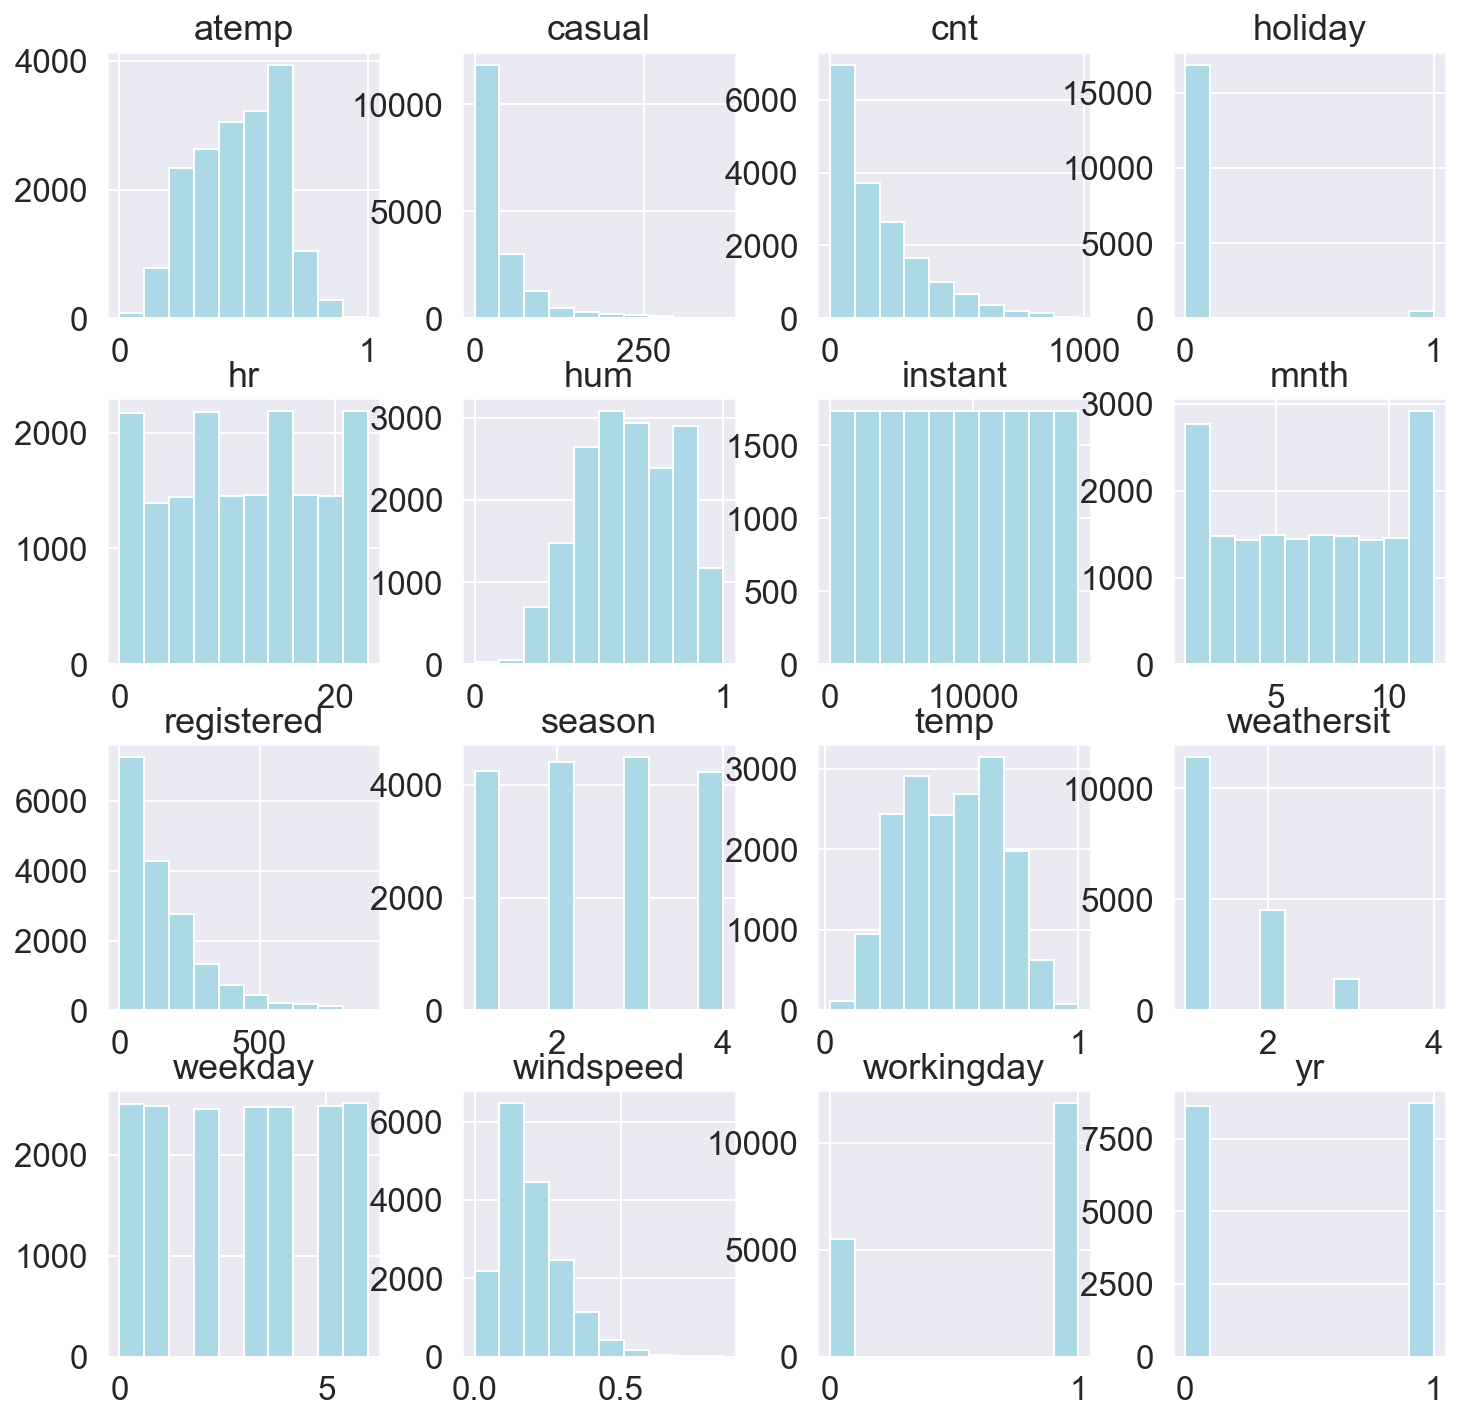

In [5]:
df.hist(figsize=(12, 12), color='lightblue')
plt.show()

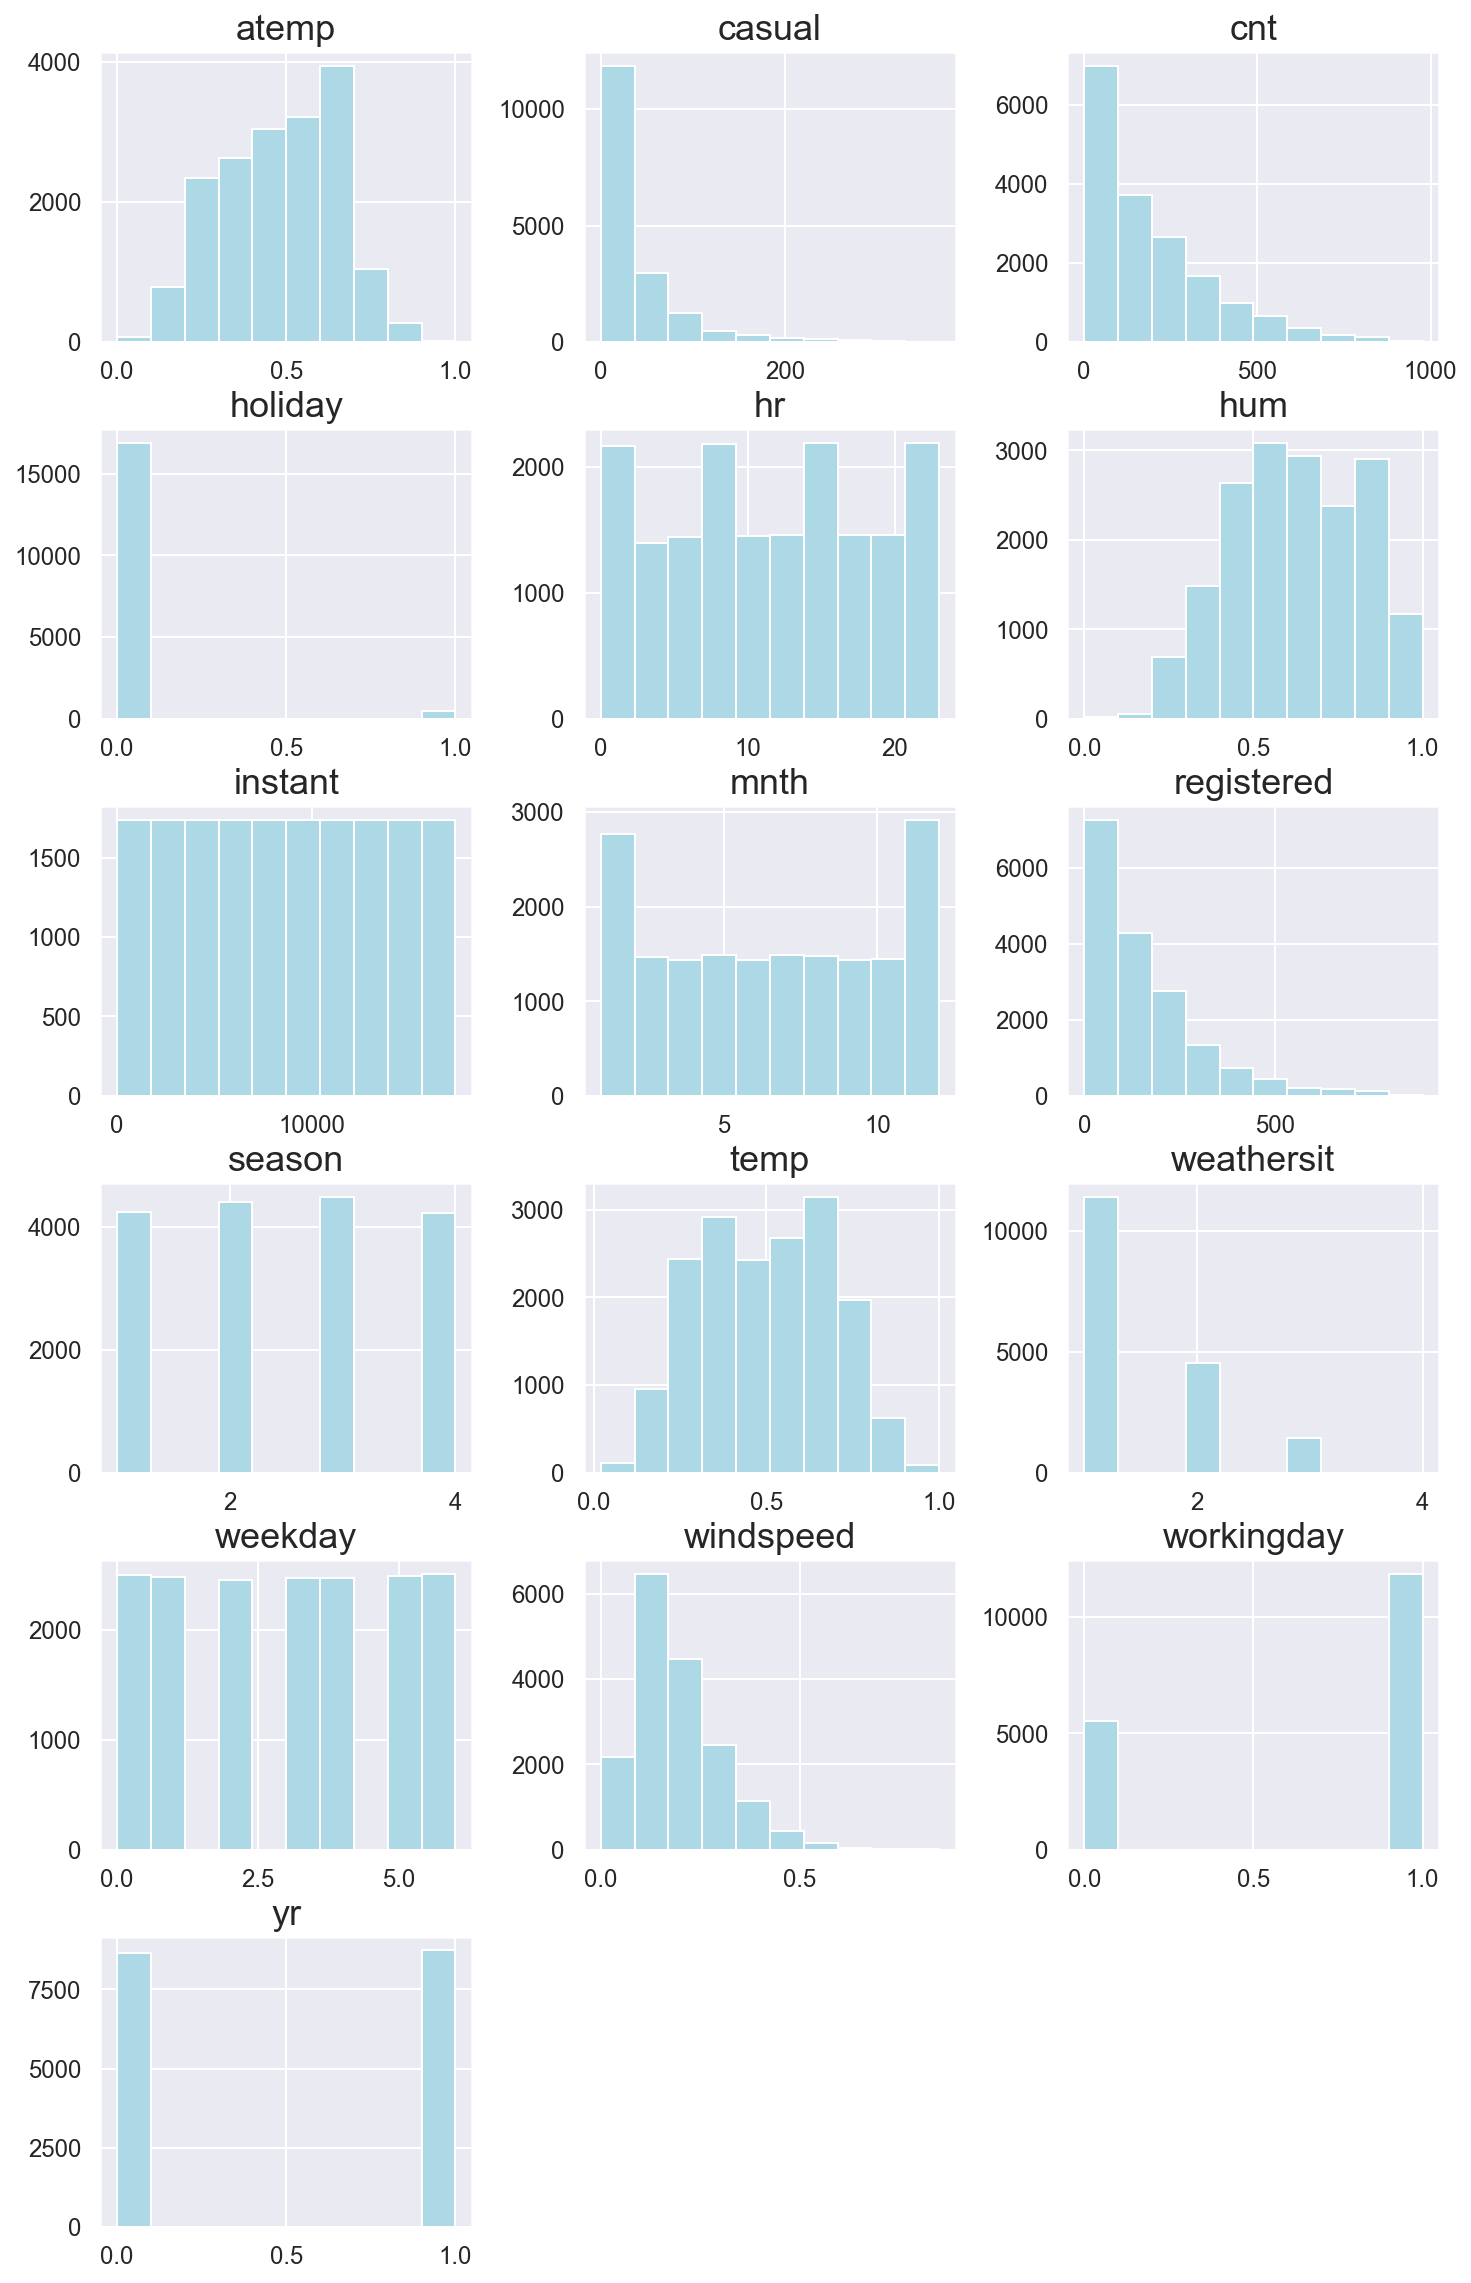

In [6]:
df.hist(figsize=(12, 20), color='lightblue',
        layout=(6, 3), xlabelsize=12, ylabelsize=12)
plt.show()

### Box plots

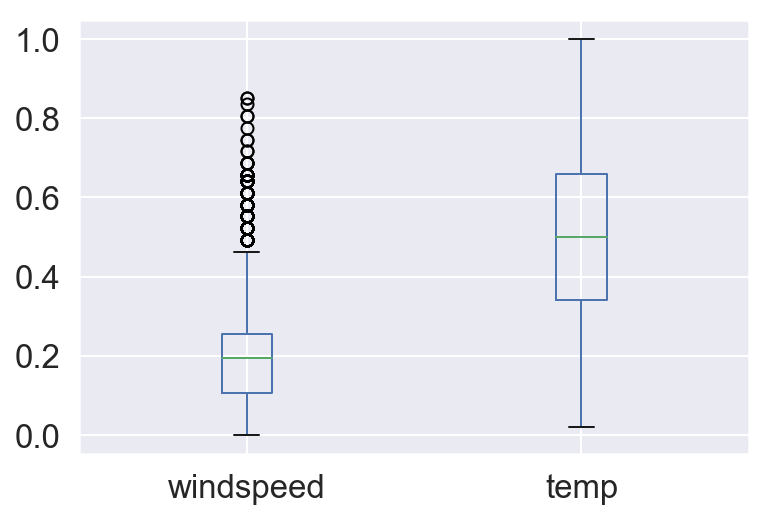

In [7]:
df.plot(y=['windspeed', 'temp'], kind='box')
plt.show()

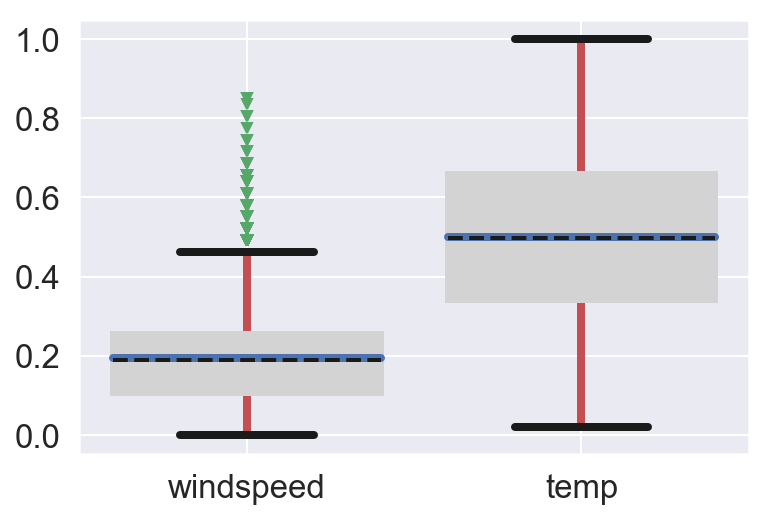

In [8]:
boxplot = df.plot(
    y=['windspeed', 'temp'],
    kind='box',
    showmeans=True,
    meanline=True,
    patch_artist=True,
    widths=[0.8, 0.8],
    color={'boxes': 'lightgrey', 'whiskers': 'r', 'medians': 'b', 'caps': 'k'},
    boxprops={'linestyle': '-.', 'linewidth': 3},
    medianprops={'linewidth': 4, 'linestyle': '-'},
    meanprops={'linewidth': 2, 'linestyle': '--',
               'markersize': 10, 'color': 'k'},
    flierprops={'marker': 'v', 'markersize': 5,
                'markerfacecolor': 'g', 'markeredgecolor': 'g'},
    whiskerprops={'linestyle': '-', 'linewidth': 4},
    capprops={'linestyle': '-', 'linewidth': 4})

### Scatter plots

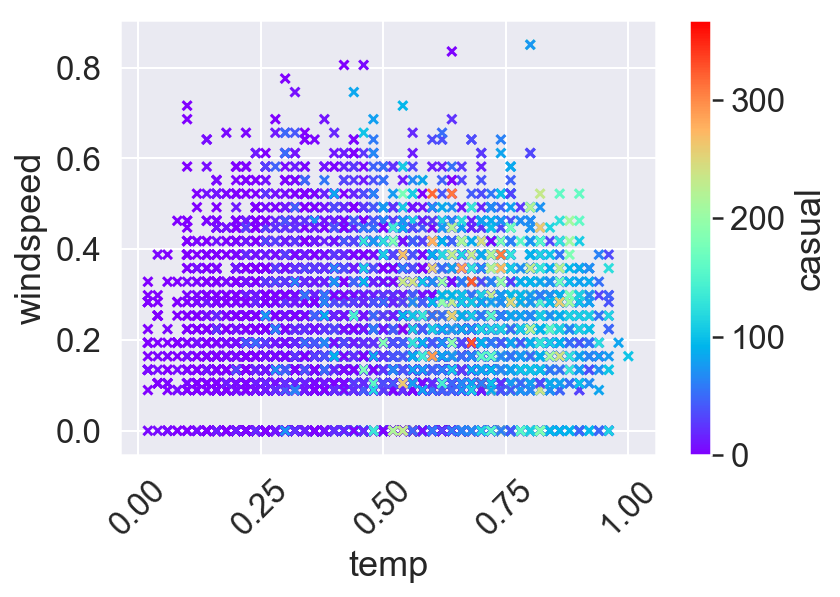

In [9]:
df.plot(x='temp', y='windspeed',
        kind='scatter', c='casual',
        marker='x', cmap='rainbow',
        rot=45, sharex=False)  # set sharex=False otherwise xticklabels won't get displayed because of colorbar
plt.show()

## Grouping

### Group by one variable, aggregate another

In [10]:
df.groupby('season')[['temp']].mean()

,temp
season,
1,0.299147
2,0.544663
3,0.706410
4,0.423138


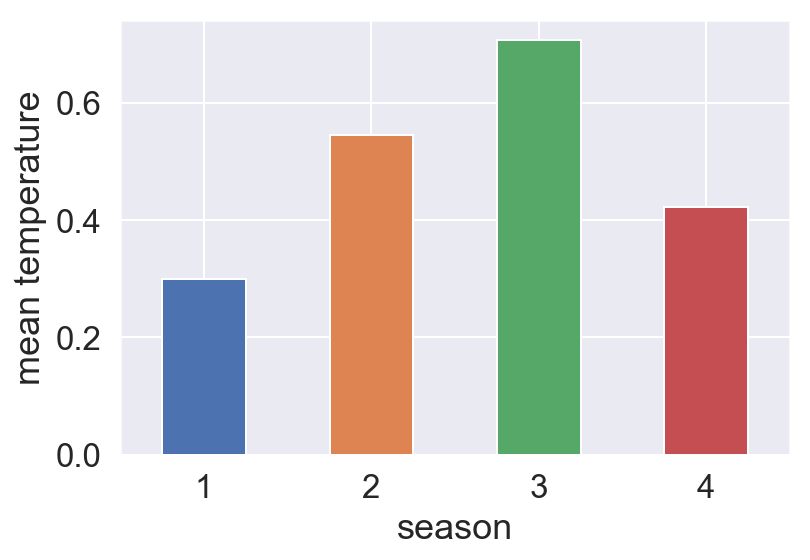

In [11]:
df.groupby('season')['temp'].mean().plot(kind='bar')
plt.ylabel('mean temperature')
plt.xticks(rotation=0)
plt.show()

### Group by multiple variables, aggregate multiple variables in different ways

In [12]:
grouped = df.groupby(['yr', 'season'])[['temp', 'hum']]
grouped_agg = grouped.agg([np.mean, np.std])
grouped_agg

temp                 hum          
               mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

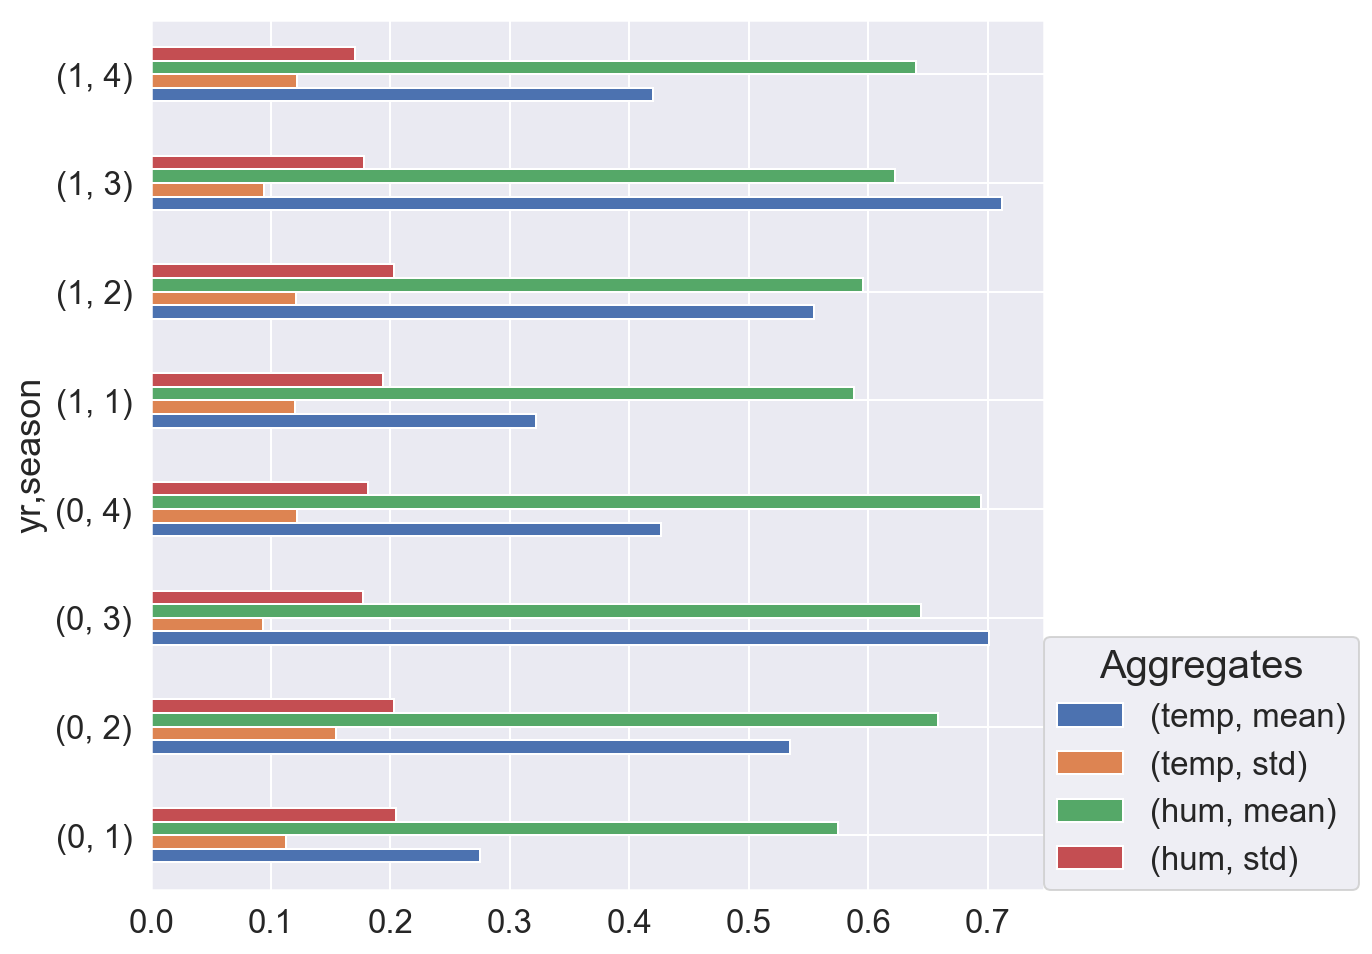

In [13]:
ax = grouped_agg.plot(kind='barh', stacked=False,
                      figsize=(8, 8), secondary_y=False)
plt.legend(loc=[1, 0], title='Aggregates', title_fontsize=20)
plt.show()

In [14]:
y_labels = [year + '-' + season for year in ['2011', '2012']
            for season in df.season.unique().astype(str)]
y_labels

['2011-1',
 '2011-2',
 '2011-3',
 '2011-4',
 '2012-1',
 '2012-2',
 '2012-3',
 '2012-4']

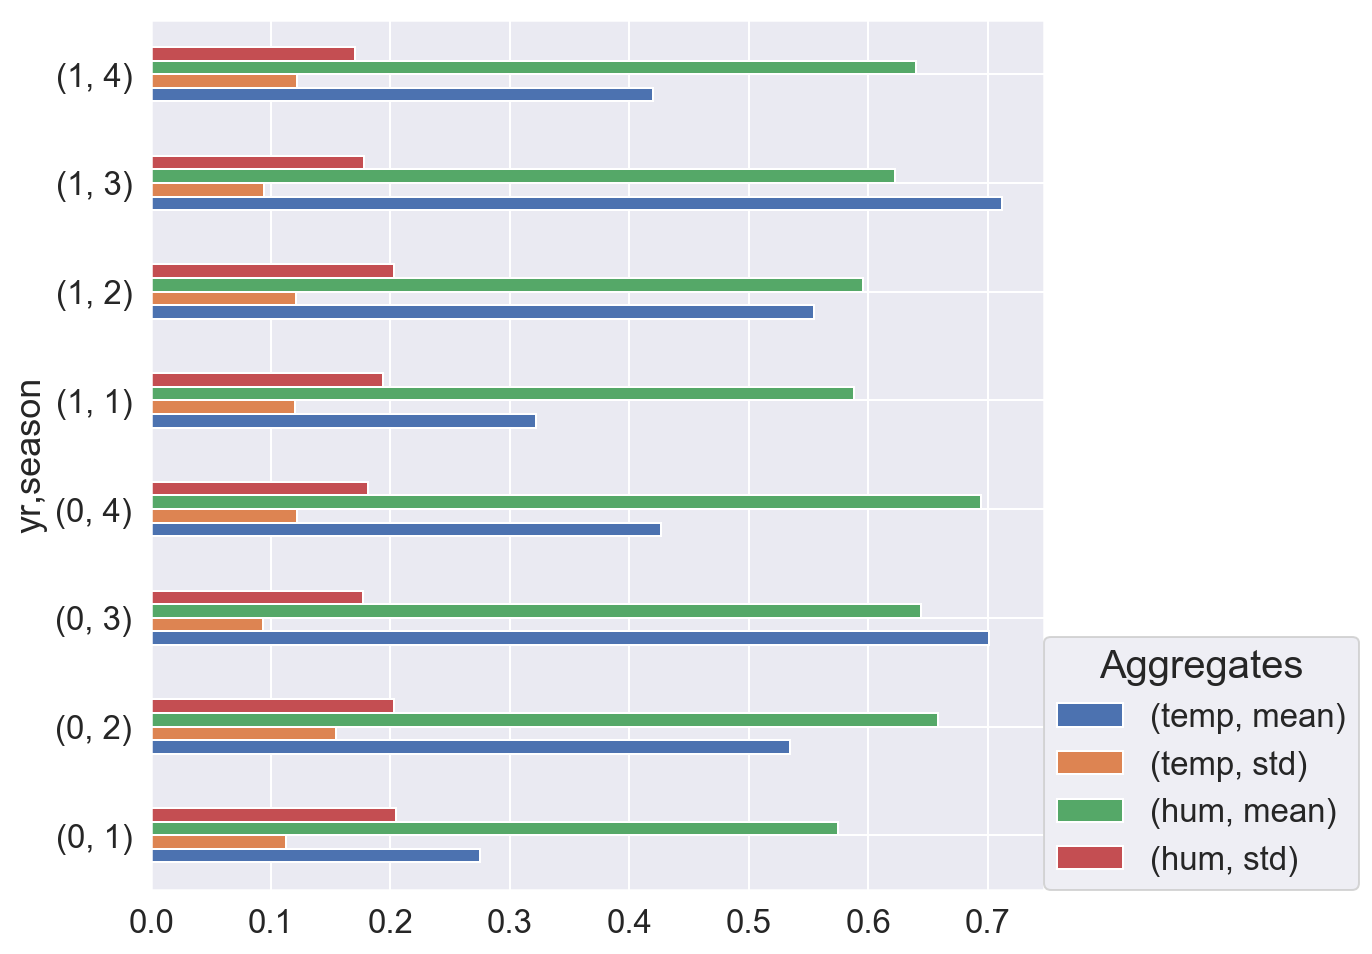

In [15]:
ax = grouped_agg.plot(kind='barh', stacked=False,
                      figsize=(8, 8), secondary_y=False)
ax.legend(loc=[1, 0], title='Aggregates', title_fontsize=20)
ax.set_yticks(ax.get_yticks(), y_labels)
plt.show()

In [16]:
# needed the ticks to tell that they should be replaced
ax.get_yticks()

array([0, 1, 2, 3, 4, 5, 6, 7])

### Customized functions

We can define our own functions to be used for aggregation and give them as argument with `apply`. The argument of the user-defined function is a data frame resulting from the individual grouping. 

For example we can write a function standardizes using the means and standard deviations of the respective means.

In [17]:
df.groupby(['yr','mnth'])[['temp']].apply(lambda x: (x-x.mean())/x.std()).head()

,temp
0,0.545462
1,0.289300
2,0.289300
3,0.545462
4,0.545462


Let's verify the result through slicing instead of grouping.

In [18]:
df[(df.yr==0)&(df.mnth==1)][['temp']].apply(lambda x: (x-x.mean())/x.std()).head()

,temp
0,0.545462
1,0.289300
2,0.289300
3,0.545462
4,0.545462


### Dealing with the multi-index

In [19]:
# get the index
grouped_agg.index

MultiIndex(levels=[[0, 1], [1, 2, 3, 4]],
           labels=[[0, 0, 0, 0, 1, 1, 1, 1], [0, 1, 2, 3, 0, 1, 2, 3]],
           names=['yr', 'season'])

In [20]:
# get the columns
grouped_agg.columns

MultiIndex(levels=[['temp', 'hum'], ['mean', 'std']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]])

In [21]:
# add names for the column levels for convenience
grouped_agg.columns.names = ['variables', 'agg']

In [22]:
# check the columns
grouped_agg.columns

MultiIndex(levels=[['temp', 'hum'], ['mean', 'std']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['variables', 'agg'])

In [23]:
# get the column levels
grouped_agg.columns.get_level_values(
    0), grouped_agg.columns.get_level_values(1)

(Index(['temp', 'temp', 'hum', 'hum'], dtype='object', name='variables'),
 Index(['mean', 'std', 'mean', 'std'], dtype='object', name='agg'))

In [24]:
# get the index levels
grouped_agg.index.get_level_values(0), grouped_agg.index.get_level_values(1)

(Int64Index([0, 0, 0, 0, 1, 1, 1, 1], dtype='int64', name='yr'),
 Int64Index([1, 2, 3, 4, 1, 2, 3, 4], dtype='int64', name='season'))

In [25]:
# check look of the table now
grouped_agg

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

#### Swap levels

Sometimes you might want to rearrange the layout.

In [26]:
grouped_agg.swaplevel(axis=1)

agg            mean       std      mean       std
variables      temp      temp       hum       hum
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

#### Sorting along a particular level

In [27]:
# sorting by index level
grouped_agg.sort_index(level='season')

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
1  1       0.321785  0.120013  0.587746  0.194246
0  2       0.534607  0.154584  0.658311  0.202695
1  2       0.554705  0.121197  0.595775  0.203289
0  3       0.701339  0.093583  0.644125  0.177128
1  3       0.711445  0.093969  0.622287  0.177968
0  4       0.426354  0.122308  0.694016  0.181350
1  4       0.419867  0.121966  0.639771  0.170580

In [28]:
# sorting by column levels indicating a full tuple
grouped_agg.sort_values(by=('hum', 'std'))

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
1  4       0.419867  0.121966  0.639771  0.170580
0  3       0.701339  0.093583  0.644125  0.177128
1  3       0.711445  0.093969  0.622287  0.177968
0  4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
0  2       0.534607  0.154584  0.658311  0.202695
1  2       0.554705  0.121197  0.595775  0.203289
0  1       0.275348  0.112579  0.574623  0.204515

### Take that

In [29]:
# take takes lists of indices for positions in multi-index
grouped_agg.take([1, 3], axis=0)

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  2       0.534607  0.154584  0.658311  0.202695
   4       0.426354  0.122308  0.694016  0.181350

In [30]:
grouped_agg.take([1, 0], axis=1)

variables      temp          
agg             std      mean
yr season                    
0  1       0.112579  0.275348
   2       0.154584  0.534607
   3       0.093583  0.701339
   4       0.122308  0.426354
1  1       0.120013  0.321785
   2       0.121197  0.554705
   3       0.093969  0.711445
   4       0.121966  0.419867

#### We can access different parts of the multi-level structure with `.xs()`.

In [31]:
# extract along axis=0
grouped_agg.xs(1)

variables      temp                 hum          
agg            mean       std      mean       std
season                                           
1          0.321785  0.120013  0.587746  0.194246
2          0.554705  0.121197  0.595775  0.203289
3          0.711445  0.093969  0.622287  0.177968
4          0.419867  0.121966  0.639771  0.170580

In [32]:
# extract along axis=1 refering to various column levels
grouped_agg.xs([('hum', 'mean')], axis=1)

variables       hum
agg            mean
yr season          
0  1       0.574623
   2       0.658311
   3       0.644125
   4       0.694016
1  1       0.587746
   2       0.595775
   3       0.622287
   4       0.639771

In [33]:
# extract along both axes
grouped_agg.xs(('hum', 'mean'), axis=1).xs((0), axis=0)

season
1    0.574623
2    0.658311
3    0.644125
4    0.694016
Name: (hum, mean), dtype: float64

In [34]:
grouped_agg.xs(1, level='season', axis=0)

variables      temp                 hum          
agg            mean       std      mean       std
yr                                               
0          0.275348  0.112579  0.574623  0.204515
1          0.321785  0.120013  0.587746  0.194246

In [35]:
grouped_agg.xs(0, level='yr', axis=0)

variables      temp                 hum          
agg            mean       std      mean       std
season                                           
1          0.275348  0.112579  0.574623  0.204515
2          0.534607  0.154584  0.658311  0.202695
3          0.701339  0.093583  0.644125  0.177128
4          0.426354  0.122308  0.694016  0.181350

In [36]:
grouped_agg.xs('std', level='agg', axis=1)

variables      temp       hum
yr season                    
0  1       0.112579  0.204515
   2       0.154584  0.202695
   3       0.093583  0.177128
   4       0.122308  0.181350
1  1       0.120013  0.194246
   2       0.121197  0.203289
   3       0.093969  0.177968
   4       0.121966  0.170580

In [37]:
grouped_agg.xs('hum', level='variables', axis=1)

agg            mean       std
yr season                    
0  1       0.574623  0.204515
   2       0.658311  0.202695
   3       0.644125  0.177128
   4       0.694016  0.181350
1  1       0.587746  0.194246
   2       0.595775  0.203289
   3       0.622287  0.177968
   4       0.639771  0.170580

#### Using `.loc`

Most useful for slicing.

In [38]:
grouped_agg.loc[(0, slice(2, 4)), :]

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350

In [39]:
grouped_agg.loc[(0, slice(2, 4)), (slice('temp'), slice(None))]

variables      temp          
agg            mean       std
yr season                    
0  2       0.534607  0.154584
   3       0.701339  0.093583
   4       0.426354  0.122308

In [40]:
# better to use `pd.IndexSlice`
idx = pd.IndexSlice

In [41]:
grouped_agg.loc[idx[:, 3:4], idx['hum', :]]

variables       hum          
agg            mean       std
yr season                    
0  3       0.644125  0.177128
   4       0.694016  0.181350
1  3       0.622287  0.177968
   4       0.639771  0.170580

In [42]:
grouped_agg.loc[idx[:, 3:4], idx['hum', 'std']]

yr  season
0   3         0.177128
    4         0.181350
1   3         0.177968
    4         0.170580
Name: (hum, std), dtype: float64

In [43]:
grouped_agg.loc(axis=0)[idx[:, 3:4]]

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

In [44]:
grouped_agg.loc(axis=1)[idx[:, 'std']]

variables      temp       hum
agg             std       std
yr season                    
0  1       0.112579  0.204515
   2       0.154584  0.202695
   3       0.093583  0.177128
   4       0.122308  0.181350
1  1       0.120013  0.194246
   2       0.121197  0.203289
   3       0.093969  0.177968
   4       0.121966  0.170580

In [45]:
grouped_agg.iloc(axis=1)[idx[:, 1]]

yr  season
0   1         0.112579
    2         0.154584
    3         0.093583
    4         0.122308
1   1         0.120013
    2         0.121197
    3         0.093969
    4         0.121966
Name: (temp, std), dtype: float64

#### Extracting by referring directly to column levels

In [46]:
grouped_agg

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

In [47]:
grouped_agg['temp'][['mean', 'std']]

agg            mean       std
yr season                    
0  1       0.275348  0.112579
   2       0.534607  0.154584
   3       0.701339  0.093583
   4       0.426354  0.122308
1  1       0.321785  0.120013
   2       0.554705  0.121197
   3       0.711445  0.093969
   4       0.419867  0.121966

#### Create flat levels

In case you get fed up with multi-level structures.

In [48]:
# create a copy
grouped_agg_1 = grouped_agg.copy()

In [49]:
# reset columns
grouped_agg_1.columns = [(x, y) for x in grouped_agg.columns.levels[0]
                         for y in grouped_agg.columns.levels[1]]

In [50]:
# reset index
grouped_agg_1 = grouped_agg_1.reset_index()
grouped_agg_1

,yr,season,"(temp, mean)","(temp, std)","(hum, mean)","(hum, std)"
0,0,1,0.275348,0.112579,0.574623,0.204515
1,0,2,0.534607,0.154584,0.658311,0.202695
2,0,3,0.701339,0.093583,0.644125,0.177128
3,0,4,0.426354,0.122308,0.694016,0.181350
4,1,1,0.321785,0.120013,0.587746,0.194246
5,1,2,0.554705,0.121197,0.595775,0.203289
6,1,3,0.711445,0.093969,0.622287,0.177968
7,1,4,0.419867,0.121966,0.639771,0.170580


In [51]:
# proceed as normal
grouped_agg_1[grouped_agg_1.yr == 0][[('hum', 'mean'), ('temp', 'std')]]

,"(hum, mean)","(temp, std)"
0,0.574623,0.112579
1,0.658311,0.154584
2,0.644125,0.093583
3,0.694016,0.122308


### Stacking

Switch to long or wide format with the commands `.stack()` or `.unstack()`.

In [52]:
stacked = grouped_agg.stack()
stacked

variables           temp       hum
yr season agg                     
0  1      mean  0.275348  0.574623
          std   0.112579  0.204515
   2      mean  0.534607  0.658311
          std   0.154584  0.202695
   3      mean  0.701339  0.644125
          std   0.093583  0.177128
   4      mean  0.426354  0.694016
          std   0.122308  0.181350
1  1      mean  0.321785  0.587746
          std   0.120013  0.194246
   2      mean  0.554705  0.595775
          std   0.121197  0.203289
   3      mean  0.711445  0.622287
          std   0.093969  0.177968
   4      mean  0.419867  0.639771
          std   0.121966  0.170580

In [53]:
grouped_agg.stack().stack()

yr  season  agg   variables
0   1       mean  temp         0.275348
                  hum          0.574623
            std   temp         0.112579
                  hum          0.204515
    2       mean  temp         0.534607
                  hum          0.658311
            std   temp         0.154584
                  hum          0.202695
    3       mean  temp         0.701339
                  hum          0.644125
            std   temp         0.093583
                  hum          0.177128
    4       mean  temp         0.426354
                  hum          0.694016
            std   temp         0.122308
                  hum          0.181350
1   1       mean  temp         0.321785
                  hum          0.587746
            std   temp         0.120013
                  hum          0.194246
    2       mean  temp         0.554705
                  hum          0.595775
            std   temp         0.121197
                  hum          0.203289
    3       

The operation is invertible.

In [54]:
grouped_agg.stack().unstack()

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

In [55]:
grouped_agg.unstack().stack()

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

In [56]:
unstacked = grouped_agg.unstack()
unstacked

variables      temp                                                    \
agg            mean                                     std             
season            1         2         3         4         1         2   
yr                                                                      
0          0.275348  0.534607  0.701339  0.426354  0.112579  0.154584   
1          0.321785  0.554705  0.711445  0.419867  0.120013  0.121197   

variables                           hum                                \
agg                                mean                                 
season            3         4         1         2         3         4   
yr                                                                      
0          0.093583  0.122308  0.574623  0.658311  0.644125  0.694016   
1          0.093969  0.121966  0.587746  0.595775  0.622287  0.639771   

variables                                         
agg             std                               
season            1         2         3        4  
yr                                                
0          0.204515  0.202695  0.177128  0.18135  
1          0.194246  0.203289  0.177968  0.17058

In [57]:
unstacked.stack()

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

### Melt

- `id_vars`: variables kept
- `value_vars`: variables stacked

In [58]:
grouped_agg.shape

(8, 4)

In [59]:
grouped_agg.melt().shape

(32, 3)

In [60]:
grouped_agg.melt()

,variables,agg,value
0,temp,mean,0.275348
1,temp,mean,0.534607
2,temp,mean,0.701339
3,temp,mean,0.426354
4,temp,mean,0.321785
5,temp,mean,0.554705
6,temp,mean,0.711445
7,temp,mean,0.419867
8,temp,std,0.112579
9,temp,std,0.154584


In [61]:
grouped_agg.reset_index().melt().head()

,variables,agg,value
0,yr,,0.0
1,yr,,0.0
2,yr,,0.0
3,yr,,0.0
4,yr,,1.0


In [62]:
grouped_agg.reset_index().melt(id_vars=['yr', 'season']).head()

,yr,season,variables,agg,value
0,0,1,temp,mean,0.275348
1,0,2,temp,mean,0.534607
2,0,3,temp,mean,0.701339
3,0,4,temp,mean,0.426354
4,1,1,temp,mean,0.321785


In [63]:
grouped_agg.reset_index().melt(id_vars=['yr', 'season'],
                               value_vars=['temp', 'hum'],
                               var_name='temp_hum',
                               value_name='mean_std')

,yr,season,temp_hum,mean_std
0,0,1,temp,0.275348
1,0,2,temp,0.534607
2,0,3,temp,0.701339
3,0,4,temp,0.426354
4,1,1,temp,0.321785
5,1,2,temp,0.554705
6,1,3,temp,0.711445
7,1,4,temp,0.419867
8,0,1,temp,0.112579
9,0,2,temp,0.154584


In [64]:
grouped_agg

variables      temp                 hum          
agg            mean       std      mean       std
yr season                                        
0  1       0.275348  0.112579  0.574623  0.204515
   2       0.534607  0.154584  0.658311  0.202695
   3       0.701339  0.093583  0.644125  0.177128
   4       0.426354  0.122308  0.694016  0.181350
1  1       0.321785  0.120013  0.587746  0.194246
   2       0.554705  0.121197  0.595775  0.203289
   3       0.711445  0.093969  0.622287  0.177968
   4       0.419867  0.121966  0.639771  0.170580

### Pivot table

Pivot tables do exactly the same as grouping. The advantage here is that margins can easily be included.

- `values`: variables to be aggregated
- `index`,`columns`: levels along which is aggregated, fixing the table structure
- `aggfunc`: aggregation functions
- `margins`: report totals

In [65]:
pivot_agg = df.pivot_table(values=['temp', 'hum'],
                           index=['yr', 'season'],
                           columns=['holiday'],
                           aggfunc=[np.mean, np.std],
                           margins=True)
pivot_agg

mean                                                    \
                 hum                          temp                       
holiday            0         1       All         0         1       All   
yr  season                                                               
0   1       0.575483  0.550423  0.574623  0.275674  0.266197  0.275348   
    2       0.657870  0.678125  0.658311  0.533374  0.590000  0.534607   
    3       0.642591  0.714167  0.644125  0.701369  0.700000  0.701339   
    4       0.698123  0.576389  0.694016  0.426479  0.422778  0.426354   
1   1       0.590038  0.536452  0.587746  0.324642  0.257849  0.321785   
    2       0.595259  0.618958  0.595775  0.551733  0.688333  0.554705   
    3       0.621363  0.664792  0.622287  0.710643  0.748333  0.711445   
    4       0.638440  0.677222  0.639771  0.420474  0.402778  0.419867   
All         0.627580  0.615360  0.627229  0.497893  0.466400  0.496987   

                 std                                                    
                 hum                          temp                      
holiday            0         1       All         0         1       All  
yr  season                                                              
0   1       0.205962  0.157711  0.204515  0.113620  0.077798  0.112579  
    2       0.203192  0.179712  0.202695  0.154049  0.169605  0.154584  
    3       0.177447  0.147141  0.177128  0.094196  0.059787  0.093583  
    4       0.179634  0.191865  0.181350  0.122079  0.129541  0.122308  
1   1       0.194592  0.179792  0.194246  0.121011  0.069311  0.120013  
    2       0.204312  0.150039  0.203289  0.120111  0.091590  0.121197  
    3       0.177840  0.180566  0.177968  0.094022  0.084434  0.093969  
    4       0.171388  0.141940  0.170580  0.122868  0.092069  0.121966  
All         0.193331  0.178639  0.192924  0.191986  0.208821  0.192551